<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

### Package Version:
- tensorflow==2.2.0
- pandas==1.0.5
- numpy==1.18.5
- google==2.0.3

# Sarcasm Detection

### Dataset

#### Acknowledgement
Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Load Data (3 Marks)

In [2]:
import numpy as np
import pandas as pd
data = pd.read_json("/content/drive/My Drive/data/Sarcasm/Sarcasm_Headlines_Dataset.json", lines=True)
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


### Drop `article_link` from dataset (3 Marks)

In [3]:
del data['article_link']
data.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


### Get length of each headline and add a column for that (3 Marks)

In [4]:
data['length of each headline'] = data['headline'].str.split().str.len()
data.head()

,headline,is_sarcastic,length of each headline
0,former versace store clerk sues over secret 'b...,0,12
1,the 'roseanne' revival catches up to our thorn...,0,14
2,mom starting to fear son's web series closest ...,1,14
3,"boehner just wants wife to listen, not come up...",1,13
4,j.k. rowling wishes snape happy birthday in th...,0,11


### Initialize parameter values
- Set values for max_features, maxlen, & embedding_size
- max_features: Number of words to take from tokenizer(most frequent words)
- maxlen: Maximum length of each sentence to be limited to 25
- embedding_size: size of embedding vector

In [6]:
max_features = 10000
maxlen = 25
embedding_size = 200

### Apply `tensorflow.keras` Tokenizer and get indices for words (3 Marks)
- Initialize Tokenizer object with number of words as 10000
- Fit the tokenizer object on headline column
- Convert the text to sequence


In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(data['headline'].values)
data_token = tokenizer.texts_to_sequences(data['headline'].values)

### Pad sequences (3 Marks)
- Pad each example with a maximum length
- Convert target column into numpy array

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
data_pad = pad_sequences(data_token,maxlen=maxlen)

In [9]:
target = data['is_sarcastic'].values

### Vocab mapping
- There is no word for 0th index

In [10]:
tokenizer.word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'from': 14,
 'at': 15,
 'about': 16,
 'you': 17,
 'this': 18,
 'by': 19,
 'after': 20,
 'up': 21,
 'out': 22,
 'be': 23,
 'how': 24,
 'as': 25,
 'it': 26,
 'that': 27,
 'not': 28,
 'are': 29,
 'your': 30,
 'his': 31,
 'what': 32,
 'he': 33,
 'all': 34,
 'just': 35,
 'who': 36,
 'has': 37,
 'will': 38,
 'more': 39,
 'one': 40,
 'into': 41,
 'report': 42,
 'year': 43,
 'why': 44,
 'have': 45,
 'area': 46,
 'over': 47,
 'donald': 48,
 'u': 49,
 'day': 50,
 'says': 51,
 's': 52,
 'can': 53,
 'first': 54,
 'woman': 55,
 'time': 56,
 'like': 57,
 'her': 58,
 "trump's": 59,
 'old': 60,
 'no': 61,
 'get': 62,
 'off': 63,
 'an': 64,
 'life': 65,
 'people': 66,
 'obama': 67,
 'now': 68,
 'house': 69,
 'still': 70,
 "'": 71,
 'women': 72,
 'make': 73,
 'was': 74,
 'than': 75,
 'white': 76,
 'back': 77,
 'my': 78,
 'i': 79,
 'clinton': 80,
 'down': 81,
 'i

### Set number of words
- Since the above 0th index doesn't have a word, add 1 to the length of the vocabulary

In [11]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

29657


### Load Glove Word Embeddings (3 Marks)

In [12]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/data/Sarcasm/glove.6B.zip', 'r') as z:
  z.extractall()

In [13]:
!ls

drive		   glove.6B.200d.txt  glove.6B.50d.txt
glove.6B.100d.txt  glove.6B.300d.txt  sample_data


### Create embedding matrix

In [14]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

### Define model (5 Marks)
- Hint: Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, flatten it, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.

In [15]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Flatten
from tensorflow.keras.layers import Bidirectional,Dropout,GlobalMaxPool1D,LeakyReLU
from tensorflow.keras.optimizers import Adam


model = Sequential()
e = Embedding(num_words,output_dim=embedding_size, weights=[embedding_matrix], input_length=maxlen, trainable=True)
model.add(e)
model.add(Bidirectional(LSTM(units=30 ,return_sequences = True)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

### Compile the model (3 Marks)

In [16]:
optimizer = Adam(lr=0.001)
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 200)           5931400   
_________________________________________________________________
bidirectional (Bidirectional (None, 25, 60)            55440     
_________________________________________________________________
dropout (Dropout)            (None, 25, 60)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1500)              0         
_________________________________________________________________
dense (Dense)                (None, 20)                30020     
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

### Fit the model (4 Marks)

In [17]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
X_train, X_test, y_train, y_test = train_test_split(data_pad, target, test_size = 0.15 , random_state = 0)
es = EarlyStopping(monitor = 'val_loss', patience = 3, verbose = 2)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64,callbacks = [es], verbose=1)

Epoch 1/50
355/355 [==============================] - 22s 61ms/step - loss: 0.5697 - accuracy: 0.6779 - val_loss: 0.3534 - val_accuracy: 0.8493
Epoch 2/50
355/355 [==============================] - 21s 60ms/step - loss: 0.3655 - accuracy: 0.8605 - val_loss: 0.3087 - val_accuracy: 0.8625
Epoch 3/50
355/355 [==============================] - 21s 58ms/step - loss: 0.2653 - accuracy: 0.9034 - val_loss: 0.3343 - val_accuracy: 0.8677
Epoch 4/50
355/355 [==============================] - 21s 58ms/step - loss: 0.2035 - accuracy: 0.9315 - val_loss: 0.3855 - val_accuracy: 0.8637
Epoch 5/50
355/355 [==============================] - 21s 58ms/step - loss: 0.1558 - accuracy: 0.9498 - val_loss: 0.5079 - val_accuracy: 0.8730
Epoch 00005: early stopping


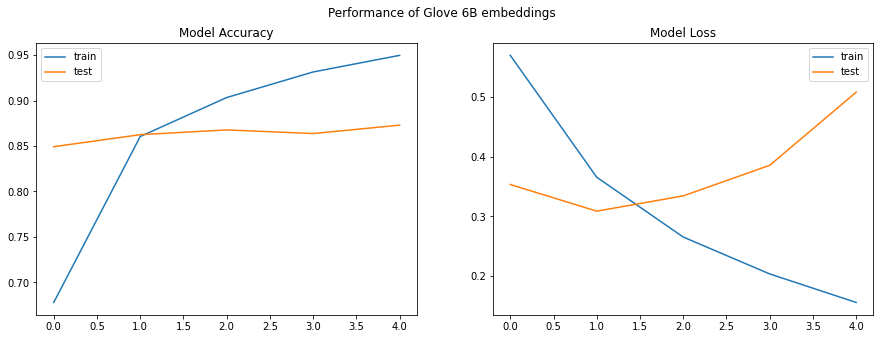

In [18]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("Performance of Glove 6B embeddings")
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
vline_cut = np.where(history.history['val_accuracy'] == np.max(history.history['val_accuracy']))[0][0]
ax1.set_title("Model Accuracy")
ax1.legend(['train', 'test'])

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
vline_cut = np.where(history.history['val_loss'] == np.min(history.history['val_loss']))[0][0]
ax2.set_title("Model Loss")
ax2.legend(['train', 'test'])
plt.show()

#### Insight


*   Train accuracy Increases with epochs and validation accuracy remains almost same
*  Train loss decreases and validation loss after 2 epochs increases

*   Clearly overfitting





In [19]:
evaluation_train = model.evaluate(X_train, y_train, verbose=0)
print("Evaluation_Train_Accuracy: %.2f%%" % (evaluation_train[1]*100))
evaluation_test = model.evaluate(X_test, y_test, verbose=0)
print("Evaluation_Train_Accuracy: %.2f%%" % (evaluation_test[1]*100))

Evaluation_Train_Accuracy: 98.04%
Evaluation_Train_Accuracy: 87.30%


## Final Insights


> Model is overfitting even with different combinations of hyperparameters and architectures.


*   Glove embeddings of 100,200 and 50 dimensions give similar results
*   I could achieve validation accuracy of 87%


### Thank You



